Name :- Atul Subhash Pandey
Roll No. :- 18

Design a decision tree for the following dataset. Tree like structure should be
displayed. Use Information gain as a parameter.

In [2]:
!pip install pydotplus

  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24581 sha256=bf2a166b34a9160ae948aa829d69927b13012aeee84907a190e3dfb2991495c1
  Stored in directory: c:\users\ismis\appdata\local\pip\cache\wheels\fe\cd\78\a7e873cc049759194f8271f780640cf96b35e5a48bef0e2f36
Successfully built pydotplus


In [3]:

import pandas as pd
from sklearn.tree import export_graphviz  
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from six import StringIO
import pydotplus
from IPython.display import Image
import os

In [4]:
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'  

In [18]:
df = pd.read_csv("C://Users//ismis//Desktop//Atul//decision.csv")  

In [19]:
print(df) 

    Alternate  Bar  Friday  Hungry  Pat  Price  Rain  Res  Type  Est  \
0           1    0       0       1  0.5      3     0    1     1    0   
1           1    0       0       1  1.0      1     0    0     2    2   
2           0    1       0       0  0.5      1     0    0     3    0   
3           1    0       1       1  1.0      1     0    0     2    1   
4           1    0       1       0  1.0      3     0    1     1    3   
5           0    1       0       1  0.5      2     1    1     4    0   
6           0    1       0       0  0.0      1     1    0     3    0   
7           0    0       0       1  0.5      2     1    1     2    0   
8           0    1       1       0  1.0      1     1    0     3    3   
9           1    1       1       1  1.0      3     0    1     4    1   
10          0    0       0       0  0.0      1     0    0     2    0   
11          1    1       1       1  1.0      1     0    0     3    2   

    TargetWait  
0            1  
1            0  
2           

In [20]:
features = ['Alternate', 'Bar', 'Friday', 'Hungry', 'Pat', 'Price', 'Rain', 'Res', 'Type', 'Est']
X = df[features]
y = df['TargetWait']  

In [21]:
print(X)  
print(y)  

    Alternate  Bar  Friday  Hungry  Pat  Price  Rain  Res  Type  Est
0           1    0       0       1  0.5      3     0    1     1    0
1           1    0       0       1  1.0      1     0    0     2    2
2           0    1       0       0  0.5      1     0    0     3    0
3           1    0       1       1  1.0      1     0    0     2    1
4           1    0       1       0  1.0      3     0    1     1    3
5           0    1       0       1  0.5      2     1    1     4    0
6           0    1       0       0  0.0      1     1    0     3    0
7           0    0       0       1  0.5      2     1    1     2    0
8           0    1       1       0  1.0      1     1    0     3    3
9           1    1       1       1  1.0      3     0    1     4    1
10          0    0       0       0  0.0      1     0    0     2    0
11          1    1       1       1  1.0      1     0    0     3    2
0     1
1     0
2     1
3     1
4     0
5     1
6     0
7     1
8     0
9     0
10    0
11    1
Name: T

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=0) 

In [23]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)  

In [24]:
print(y_pred)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  

[0 0 0]
Accuracy: 0.6666666666666666


In [25]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled=True, rounded=True,
                special_characters=True, feature_names=features, class_names=['False', 'True'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

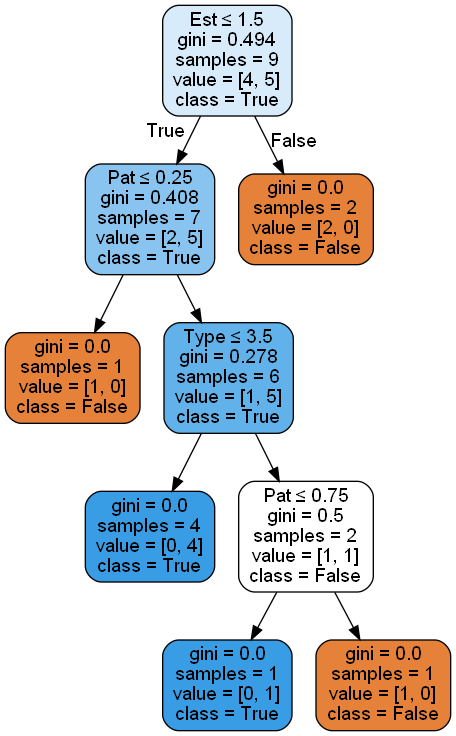

In [26]:
graph.write_png('Restaurant.png')
Image(graph.create_png())